In [47]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/app/CSRNet-pytorch")

In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [0]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [0]:
root = '/content/drive/My Drive/app/CSRNet-pytorch/data/'

In [0]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [0]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [0]:
#glob.glob(os.path.join(path_sets[0], '*.jpg'))

In [34]:
path_sets

['/data/part_A_final/test_data/images']

In [0]:
model = CSRNet()

In [0]:
model = model.cuda()

In [0]:
checkpoint = torch.load('0model_best.pth.tar') #PartAmodel_best.pth.tar

In [43]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [49]:
mae = 0
'''
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
'''
print(mae/len(img_paths))


0.0


Predicted Count :  86


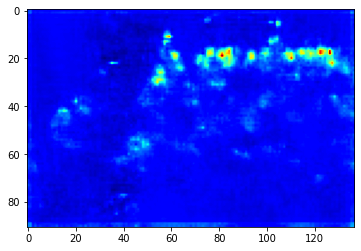

In [58]:
from matplotlib import cm as c
img = transform(Image.open('/content/drive/My Drive/app/CSRNet-pytorch/mcd_very_long.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()

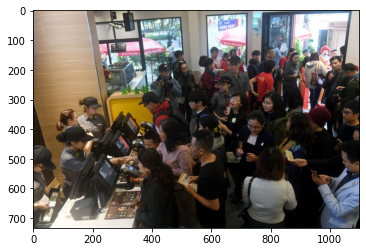

In [51]:
import matplotlib.image as mpimg
img2=mpimg.imread('/content/drive/My Drive/app/CSRNet-pytorch/mcd_very_long.jpg')
imgplot = plt.imshow(img)
plt.show()

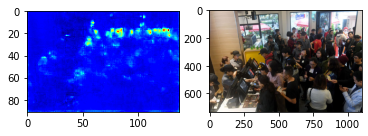

In [57]:
plt.figure
f, axarr = plt.subplots(1,2)
axarr[0].imshow(temp,cmap = c.jet)
axarr[1].imshow(mpimg.imread('/content/drive/My Drive/app/CSRNet-pytorch/mcd_very_long.jpg'))
plt.show()